#### Navid Al-Musabbir 1721853042
#### Md. Rubel Rana 1712661642

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mae

### Dataset Import

In [2]:
data = 'dataset/Jute/jute.csv'

In [3]:
df = pd.read_csv(data)

In [4]:
df.head()

,District,Area,Year,Max_Temp,Min_Temp,Rainfall,Humidity,Wind,Cloud,Sunshine,ALT,Productions,PPH
0,2,67720,1969,38.625,22.900,115.75,70.50,1.425,3.600,7.850000,20,187375,2.766907856
1,3,600,1969,33.650,23.200,323.75,81.00,3.525,4.325,7.750000,6,1380,2.3
2,4,170895,1969,35.850,23.100,279.25,80.75,1.750,2.550,6.804545,10,540030,3.160010533
3,5,216925,1969,36.075,23.850,123.75,74.25,1.775,3.975,7.650000,9,668225,3.080442549
4,6,108805,1969,36.425,22.675,171.25,69.75,0.725,2.575,6.894000,37,292870,2.691696154


In [5]:
df.tail()

,District,Area,Year,Max_Temp,Min_Temp,Rainfall,Humidity,Wind,Cloud,Sunshine,ALT,Productions,PPH
696,5,13773,2013,36.625,24.625,190.25,68.75,2.625,4.45,5.700,9,52200,3.79002396
697,6,22389,2013,37.625,22.400,150.50,73.75,1.800,3.95,6.425,37,108139,4.830005806
698,7,176626,2013,37.375,23.825,184.50,74.75,2.400,3.55,6.175,9,722400,4.089998075
699,8,57912,2013,37.750,23.750,138.00,73.50,7.450,3.30,6.250,7,296509,5.119992402
700,9,5175,2013,37.475,24.375,180.75,77.25,2.200,4.00,6.325,4,22097,4.269951691


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   District     701 non-null    int64  
 1   Area         701 non-null    int64  
 2   Year         701 non-null    int64  
 3   Max_Temp     701 non-null    float64
 4   Min_Temp     701 non-null    float64
 5   Rainfall     701 non-null    float64
 6   Humidity     701 non-null    float64
 7   Wind         701 non-null    float64
 8   Cloud        701 non-null    float64
 9   Sunshine     701 non-null    float64
 10  ALT          701 non-null    int64  
 11  Productions  701 non-null    int64  
 12  PPH          701 non-null    object 
dtypes: float64(7), int64(5), object(1)
memory usage: 71.3+ KB


In [7]:
df= df[df['Area'] != 0]
df= df[df['Productions'] != 0]
df['PPH'] = pd.to_numeric(df['PPH'])

In [8]:
z=np.abs(stats.zscore(df))

In [9]:
np.where(z > 4)

(array([  8,   8,  12,  34,  54,  54,  96, 216, 277, 281, 332, 607, 618,
        630, 641, 654], dtype=int64),
 array([ 1, 11,  4,  4,  1,  4,  3,  7, 12,  5,  5,  7,  7,  7,  7,  7],
       dtype=int64))

In [10]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [11]:
(df < (Q1 - 1.5 * IQR)) | (df < (Q3 - 1.5 * IQR))

,District,Area,Year,Max_Temp,Min_Temp,Rainfall,Humidity,Wind,Cloud,Sunshine,ALT,Productions,PPH
0,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,True,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,True,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,False,False,False,False,False,False,True,False,False,True,False,False,False
697,False,False,False,False,False,False,False,False,False,False,False,False,False
698,False,False,False,False,False,False,False,False,False,False,False,False,False
699,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df = df[(z < 4).all(axis=1)]

In [13]:
#defining response and predictor variables
X = df[['District', 'Area', 'Year', 'Max_Temp', 'Min_Temp', 'Rainfall',
       'Humidity', 'Wind', 'Cloud', 'Sunshine', 'ALT']]
y = df[['PPH']]

### Checking number of principal components and MSE

In [14]:
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

In [15]:
#defining cross-validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = LinearRegression()
mse = []

In [16]:
for i in np.arange(1, 12):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], y, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)

Text(0.5, 1.0, 'Production')

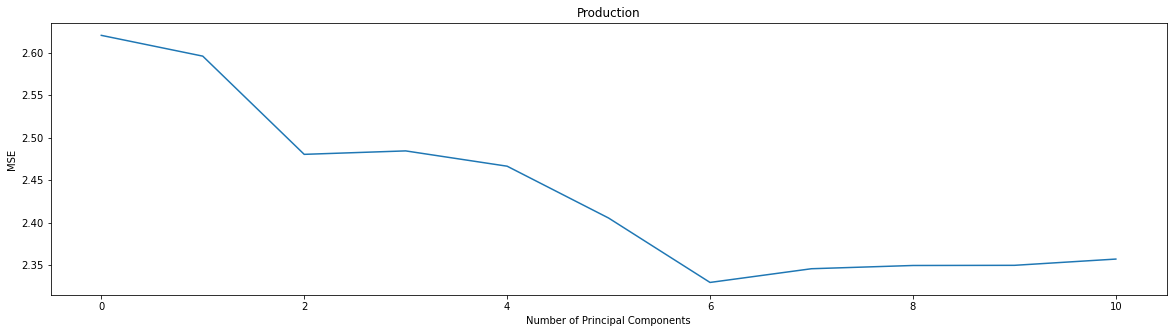

In [17]:
plt.figure(figsize=(20, 5))
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('Production')

In [18]:
#spliting the dataset
rng = np.random.RandomState(0)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=rng)

In [19]:
#scale the training and testing data
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.transform(scale(X_test))[:,:1]

In [20]:
regr = LinearRegression()
regr.fit(X_reduced_train[:,:1], y_train)

LinearRegression()

In [21]:
pred = regr.predict(X_reduced_test)
print("MSE =", np.sqrt(mean_squared_error(y_test, pred)))

MSE = 1.0236635155362308


In [22]:
print("MAE =", mae(y_test, pred))

MAE = 0.8002122273737665


### PCR RMSE, R Squared, MAE Values using 7th component

In [23]:
pcr = make_pipeline(StandardScaler(), PCA(n_components=7), LinearRegression())
pcr.fit(X_train, y_train)
pca = pcr.named_steps['pca']

In [24]:
#calculating RMSE
pcr.fit(scale(X_train), y_train)

print("RMSE =", np.sqrt(mean_squared_error(y_test, pcr.predict(scale(X_test)))))

RMSE = 0.8677013164248323


In [25]:
#calculating R2
pcr.fit(X_train, y_train)

print("R2 =", pcr.score(X_test, y_test))

R2 = 0.30449185192391837


In [26]:
#calculating MAE
pcr.fit(scale(X_train), y_train)

print("MAE =", mae(y_test, pcr.predict(scale(X_test))))

MAE = 0.629251596909334


### Plot

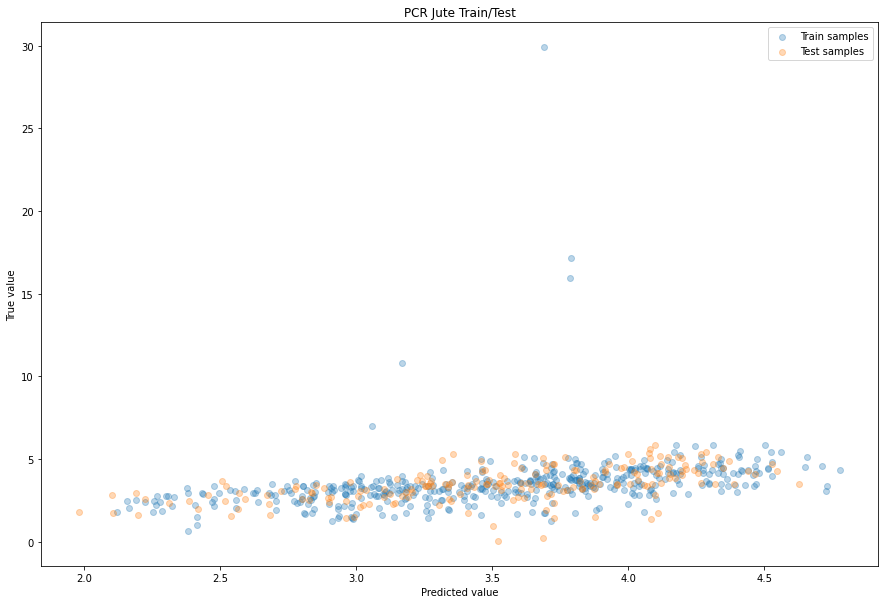

In [27]:
plt.figure(figsize=(15,10))
plt.scatter(pcr.predict(scale(X_train)), y_train, alpha=.3, label="Train samples")
plt.scatter(pcr.predict(scale(X_test)), y_test, alpha=.3, label="Test samples")
plt.title('PCR Jute Train/Test')
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.savefig("figures/pcr_jute.png")
plt.show()

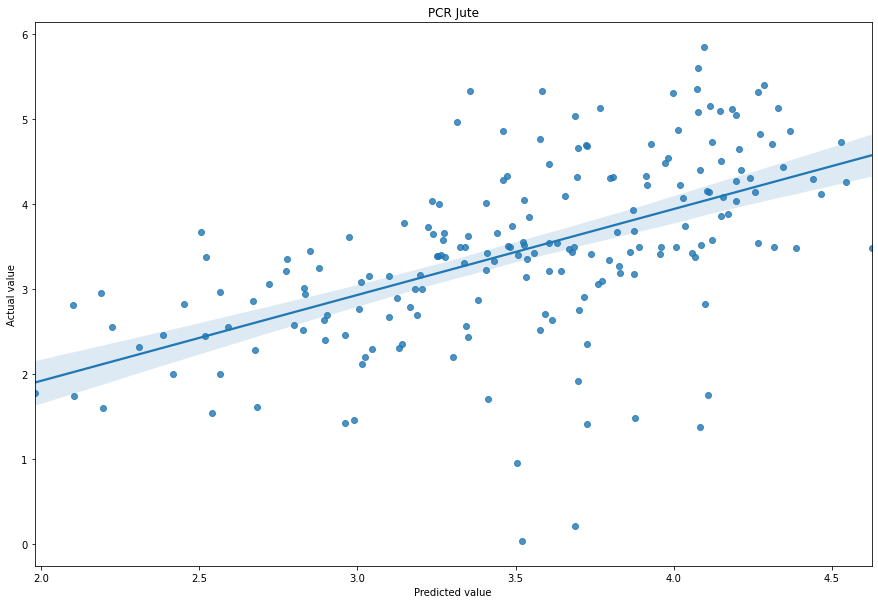

In [28]:
plt.figure(figsize=(15,10))
sns.regplot(x=pcr.predict(scale(X_test)), y = y_test, data = df)
plt.title('PCR Jute')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.savefig("figures/pcr_jute_2.png")

### Checking number of principal components and MSE

In [29]:
#defining cross-validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
mse = []
n = len(X)

In [30]:
for i in np.arange(1, 12):
    pls = PLSRegression(n_components=i)
    score = -1*model_selection.cross_val_score(pls, scale(X), y, cv=cv,
               scoring='neg_mean_squared_error').mean()
    mse.append(score)

Text(0.5, 1.0, 'Production')

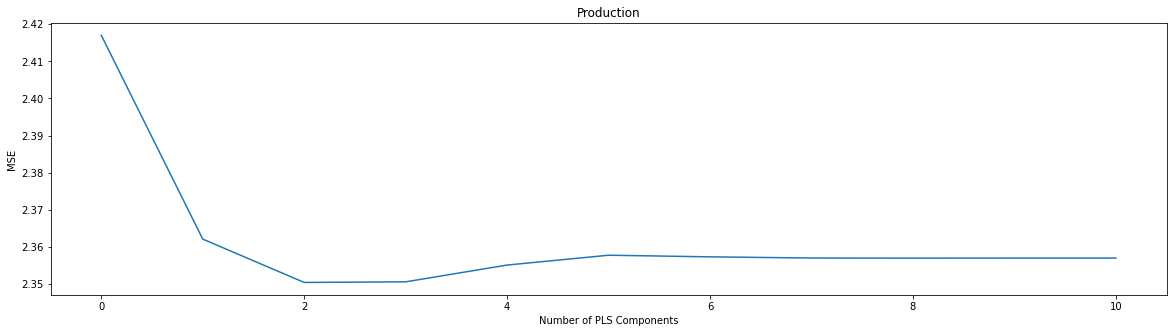

In [31]:
plt.figure(figsize=(20, 5))
plt.plot(mse)
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')
plt.title('Production')

### PLSR RMSE, R Squared, MAE Values Using 3rd Component

In [32]:
#calculating RMSE
pls = PLSRegression(n_components=3)
pls.fit(scale(X_train), y_train)

print("RMSE =", np.sqrt(mean_squared_error(y_test, pls.predict(scale(X_test)))))

RMSE = 0.8551945982795663


In [33]:
#calculating R2
pls = PLSRegression(n_components=3)
pls.fit((X_train), y_train)

print("R2 =", pls.score(X_test, y_test))

R2 = 0.3227169051584974


In [34]:
#calculating MAE
pls = PLSRegression(n_components=3)
pls.fit(scale(X_train), y_train)

print("MAE =", mae(y_test, pls.predict(scale(X_test))))

MAE = 0.6193632541556994


### Plot

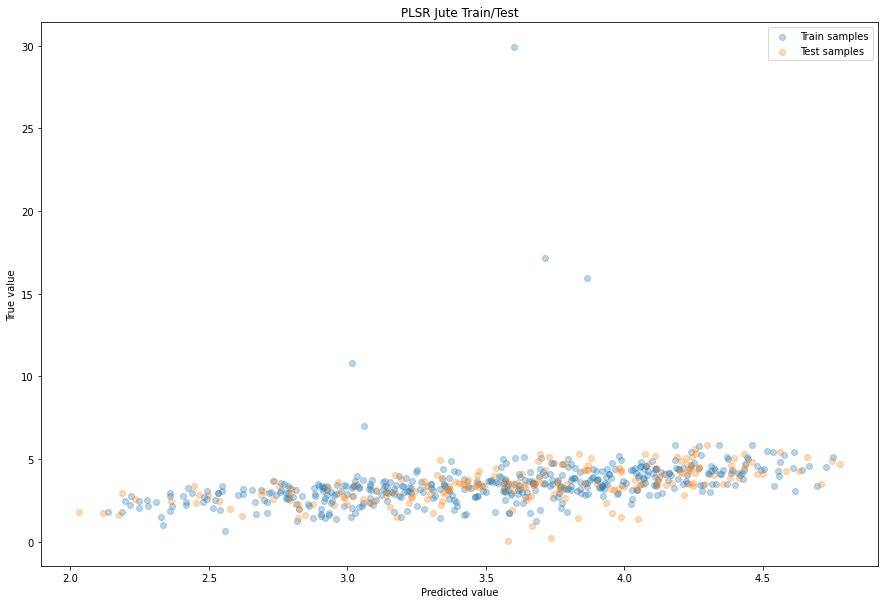

In [35]:
pls = PLSRegression(n_components=3)
pls.fit(X_train, y_train)

plt.figure(figsize=(15,10)) 
plt.scatter(pls.predict(X_train), y_train, alpha=.3, label="Train samples") 
plt.scatter(pls.predict(X_test), y_test, alpha=.3, label="Test samples")  
plt.title('PLSR Jute Train/Test')
plt.xlabel("Predicted value") 
plt.ylabel("True value") 
plt.legend()
plt.savefig("figures/plsr_jute.png")
plt.show()

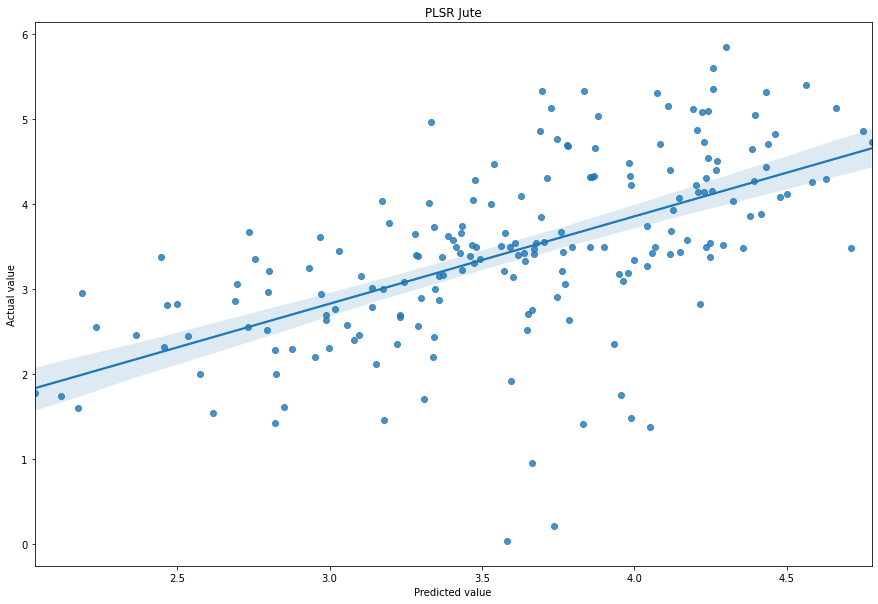

In [36]:
plt.figure(figsize=(15,10))
sns.regplot(x=pls.predict(X_test), y = y_test, data = df)
plt.title('PLSR Jute')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.savefig("figures/plsr_jute_2.png")